In [1]:
import pandas as pd
import plotly.io as pio
pio.renderers 
pio.renderers.default = 'jupyterlab'
import plotly.express as px
from plotly.offline import plot,iplot,init_notebook_mode
init_notebook_mode(connected = True)


In [2]:
houses_rent = pd.read_csv("houses_to_rent_v2.csv")


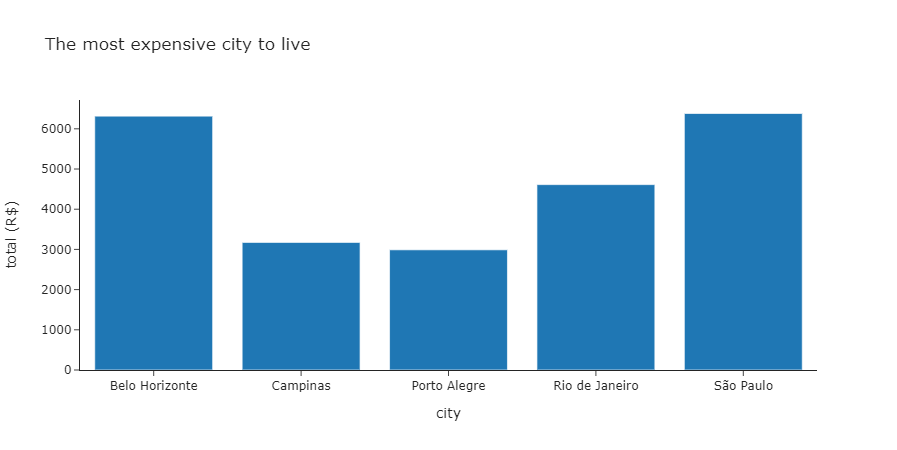

In [3]:
#Grouping the data 
houses_rent_price = houses_rent.groupby(['city'])['total (R$)'].mean().round(2)
df_houses_rent_price = pd.DataFrame(houses_rent_price)
df_houses_rent_price = df_houses_rent_price.reset_index()

fig = px.bar(df_houses_rent_price,
             x="city", #defining the x axis
             y="total (R$)", #defining y axis
             title="The most expensive city to live", #definind title
             template = "simple_white") #removing the grid line
fig
fig.write_html("Estudo/Prática/Análises/House_to_rent/grafico.html")

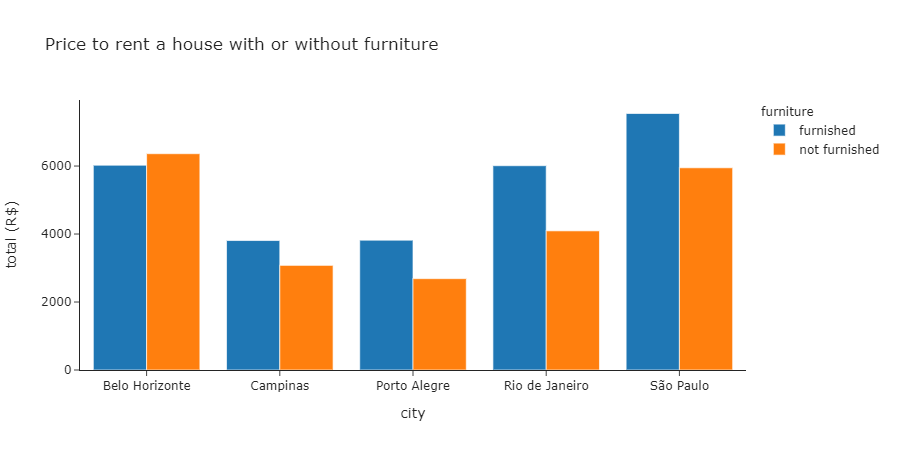

In [4]:
## Checking if the rent with furniture is more expensive than without furniture

houses_rent_furniture = houses_rent.groupby(["city","furniture"])["total (R$)"].mean().round(2)
df_houses_rent_furniture = pd.DataFrame(houses_rent_furniture)
df_houses_rent_furniture = df_houses_rent_furniture.reset_index()

fig = px.bar(df_houses_rent_furniture, #dataset
             x="city", # defining x axis
             y="total (R$)", #defining y axis
             title="Price to rent a house with or without furniture", #defining title
             template="simple_white", #removing grid line
             color="furniture", #adding the legend
             barmode="group") # showing the graph with side by side bars, if not add this line it'll be like stacked bars

fig #in my case the fig.show() didn't work, it was like the graph didn't appear. So one way to solve this is using only fig

In [5]:
#Checking the boxplot for total price 

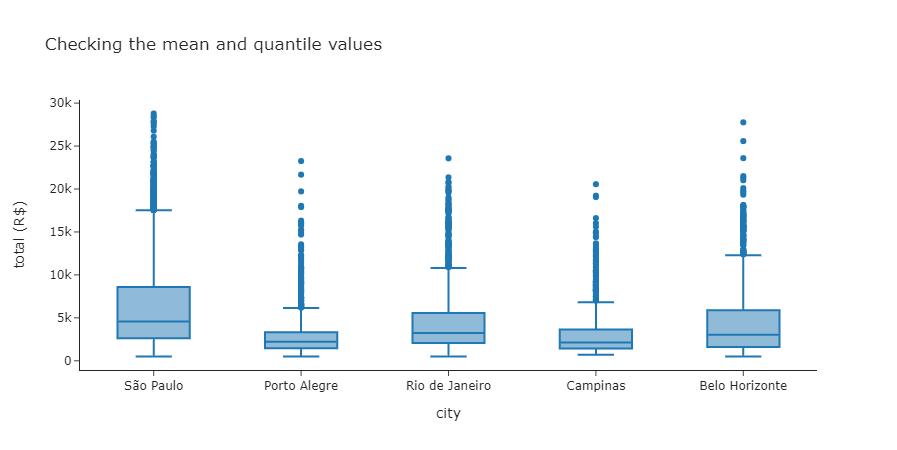

In [6]:
df_houses_price = houses_rent[["city", "total (R$)"]]
#We have some outliers getting in the way, so lets remove them.

df_houses_price = df_houses_price[df_houses_price["total (R$)"]<30000] 
#I tested some values until found out that 30000 is a good number to show either the points above the upper fence
#and the box plots

fig = px.box(df_houses_price,
             x="city",
             y="total (R$)",
             title="Checking the mean and quantile values",
             template="simple_white"
            )

fig

In [7]:
## Checking the correlation between the price and number of rooms

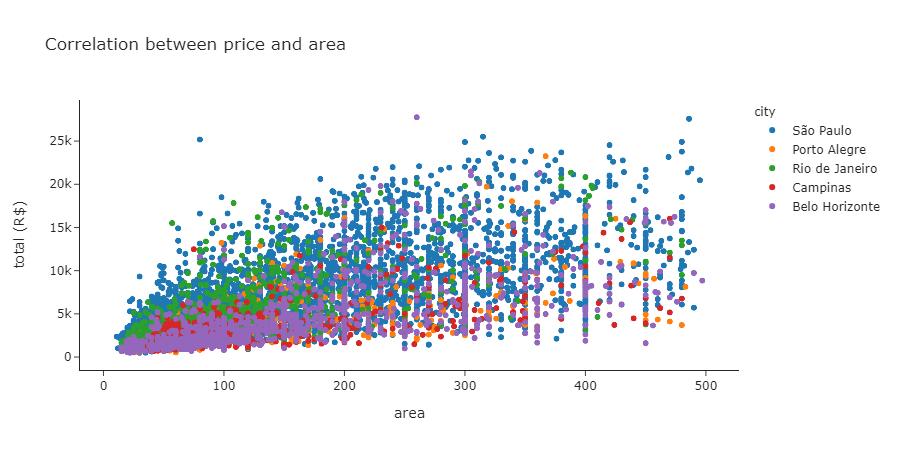

In [8]:
df_houses_price_area = houses_rent[["city", "total (R$)","area"]]
#We have some outliers getting in the way, so lets remove them.

df_houses_price_area = df_houses_price_area[df_houses_price_area["total (R$)"]<30000] 
df_houses_price_area = df_houses_price_area[df_houses_price_area["area"]<500]

fig = px.scatter(df_houses_price_area,
                 x="area",
                 y="total (R$)",
                 color="city",
                 title="Correlation between price and area",
                 template="simple_white")
fig

## All the cities have a slightly positive correlation

In [9]:
##By checking the floor column we can see that some lines have "-" as a value. Also, these same lines have 0 as
## Homeowners association tax which means that, probably, theses houses are houses and not apartments

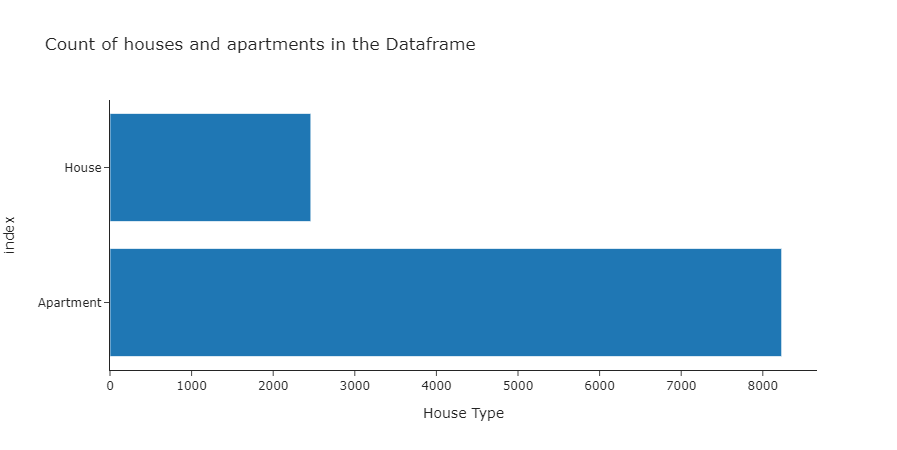

In [10]:
## Let's check how many of the lines are houses and how many are apartments,
## First, we need to change the "-" value. In this case, we're going to consider '0' as the indicative of house

houses_rent.replace({'floor':'-'}, 0, inplace = True) 
## What we did here was call Replace to help us, in the floor column, to change the "-" value to 0

## To help us build a better DataFrame let's create a column where, when floor equals 0 we say it's a House
## and when floor different than 0 we say it's an apartment
houses_rent["House Type"] = "none" ## Initialize the column
houses_rent.loc[houses_rent.floor == 0, "House Type"] = "House" #If the floor value equals to 0 than House
houses_rent.loc[houses_rent.floor != 0, "House Type"] = "Apartment" ## Otherwise, apartment

##Now that we have this change made, we can group the values with 0 and the values that don't have 0

houses_rent_floor = houses_rent["House Type"].value_counts()
df_houses_rent_floor = pd.DataFrame(houses_rent_floor).reset_index()

fig = px.bar(df_houses_rent_floor,
             x = "House Type",
             y = "index",
             title = "Count of houses and apartments in the Dataframe",
             template = "simple_white",
             orientation = 'h') ## Setting the bar orientation to ho 
fig

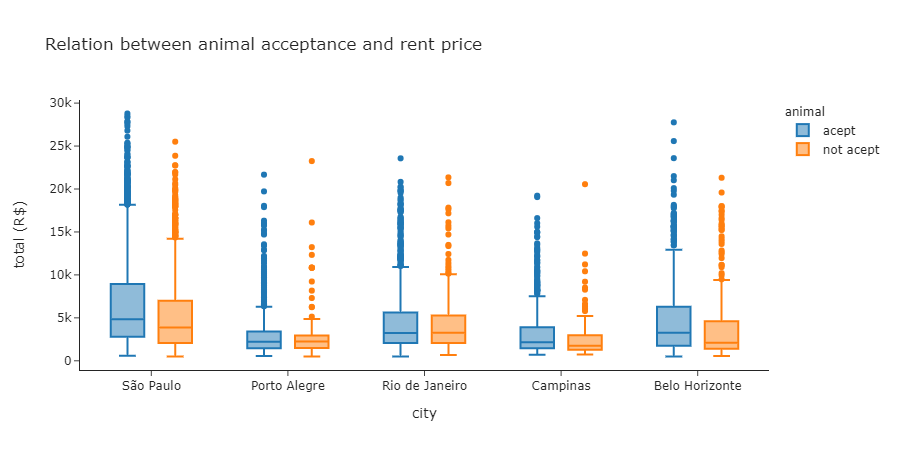

In [11]:
## Checking if the animal acceptance may have influence the total (R$)

houses_rent_animal = houses_rent[["city", "animal", "total (R$)"]]

houses_rent_animal = houses_rent_animal[houses_rent_animal["total (R$)"]<30000] 

fig = px.box(houses_rent_animal,
             x = "city",
             y = "total (R$)",
             color = "animal",
             title = "Relation between animal acceptance and rent price",
             template = "simple_white",
             )

fig

In [12]:
## Rio de Janeiro is the only place where the median doesn't change regarding the animal acceptance

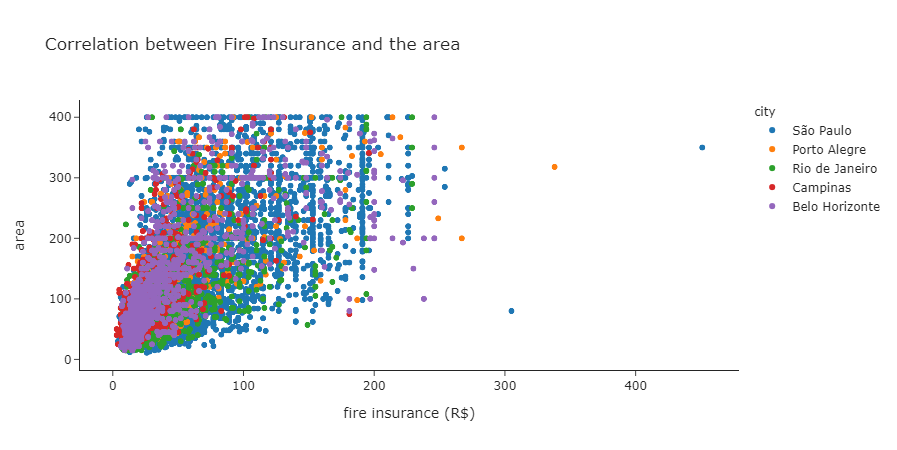

In [13]:
## Does fire insurance varies with the Area?

houses_rent_fire = houses_rent[["city","area","fire insurance (R$)"]]
houses_rent_fire = houses_rent_fire[houses_rent_fire["area"]<=400]

fig = px.scatter(houses_rent_fire,
                 x="fire insurance (R$)",
                 y="area",
                 color="city",
                 template="simple_white",
                 title="Correlation between Fire Insurance and the area")

fig
                 
                 

In [14]:
## For all the cities we can see a positive correlation. Sao Paulo has the highest correlation.
## And Belo Horizonte has the lowest correlation